## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 20s 5us/step


In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
np.max(X_train)

255

In [10]:
np.mean(X_train)

72.94035223214286

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

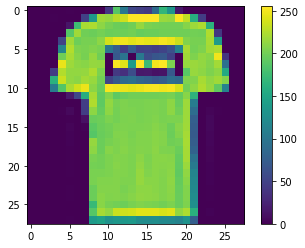

In [15]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
X_train = X_train/255.0

In [18]:
X_test = X_test/255.0

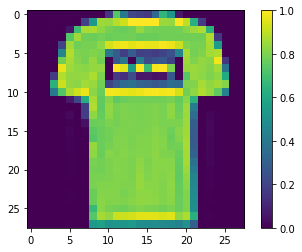

In [19]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [55]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [57]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history=model.fit(X_train, y_train, epochs = 10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 258us/sample - loss: 0.5017 - accuracy: 0.8200 - val_loss: 0.4221 - val_accuracy: 0.8453
Epoch 2/10
48000/48000 [==============================] - 12s 253us/sample - loss: 0.3762 - accuracy: 0.8628 - val_loss: 0.3917 - val_accuracy: 0.8568
Epoch 3/10
48000/48000 [==============================] - 12s 246us/sample - loss: 0.3377 - accuracy: 0.8746 - val_loss: 0.3623 - val_accuracy: 0.8673
Epoch 4/10
48000/48000 [==============================] - 12s 246us/sample - loss: 0.3164 - accuracy: 0.8823 - val_loss: 0.3324 - val_accuracy: 0.8823
Epoch 5/10
48000/48000 [==============================] - 12s 246us/sample - loss: 0.2973 - accuracy: 0.8889 - val_loss: 0.3483 - val_accuracy: 0.8753
Epoch 6/10
48000/48000 [==============================] - 12s 248us/sample - loss: 0.2811 - accuracy: 0.8948 - val_loss: 0.3260 - val_accuracy: 0.8836
Epoch 7/10
48000/48000 [====================

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8835


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
y_pred = model.predict_classes(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.8835

In [63]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [64]:
pred = model.predict(X_test)

In [65]:
pred

array([[6.0940515e-12, 9.7575083e-16, 2.2299587e-14, ..., 4.6171653e-03,
        2.9540675e-11, 9.9528438e-01],
       [1.0417760e-05, 1.8997058e-14, 9.9841213e-01, ..., 1.7820153e-23,
        7.1140014e-14, 2.1006478e-16],
       [2.2383833e-11, 1.0000000e+00, 6.8845327e-19, ..., 2.7142821e-30,
        8.7466533e-14, 4.5680651e-28],
       ...,
       [1.9822237e-06, 1.8965252e-13, 6.3632274e-07, ..., 5.8851713e-12,
        9.9994099e-01, 4.7309498e-13],
       [1.0441278e-12, 9.9999988e-01, 1.7633423e-15, ..., 1.1642731e-20,
        2.2777211e-11, 8.6461226e-17],
       [4.1056323e-05, 6.0853935e-09, 6.0869238e-06, ..., 2.3301365e-03,
        2.6925869e-04, 5.8193084e-05]], dtype=float32)

In [66]:
pred[0]

array([6.0940515e-12, 9.7575083e-16, 2.2299587e-14, 3.9736441e-16,
       1.2652807e-15, 9.8499178e-05, 4.4798459e-13, 4.6171653e-03,
       2.9540675e-11, 9.9528438e-01], dtype=float32)

In [67]:
np.argmax(pred[0])

9

In [68]:
np.argmax(pred[1])

2

In [69]:
history.history

{'loss': [0.5016730953915006,
  0.37618169620322683,
  0.337732359786011,
  0.3164460493798227,
  0.2973249305225424,
  0.2810623962638541,
  0.26839506279394604,
  0.25892001575243434,
  0.2528285133458716,
  0.2439177845761636],
 'accuracy': [0.82002085,
  0.86277086,
  0.8745625,
  0.8822917,
  0.8889375,
  0.89479166,
  0.8996875,
  0.9028958,
  0.9050417,
  0.9070208],
 'val_loss': [0.42207698318408804,
  0.3916572318043715,
  0.3623067807260668,
  0.33241365585126914,
  0.34828218426545693,
  0.3259850264088406,
  0.3416279367531388,
  0.37871329950682897,
  0.3456901092079352,
  0.3193574863569059],
 'val_accuracy': [0.84525,
  0.85675,
  0.86733335,
  0.88233334,
  0.8753333,
  0.8835833,
  0.88208336,
  0.87375,
  0.88025,
  0.891]}

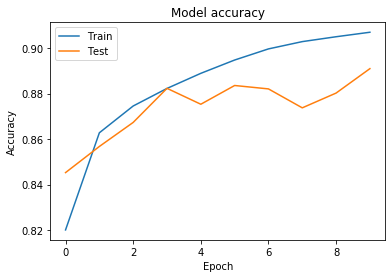

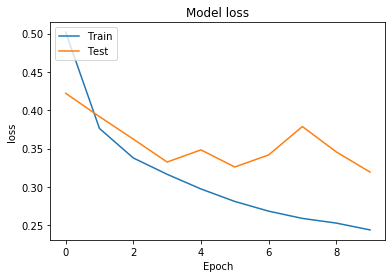

In [75]:
#plot training and validation_test accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#plot train and validation loss values
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [76]:
#validation accuracy is less than the training accuracy it say that our model getting over fitting

### plot confusion metrix

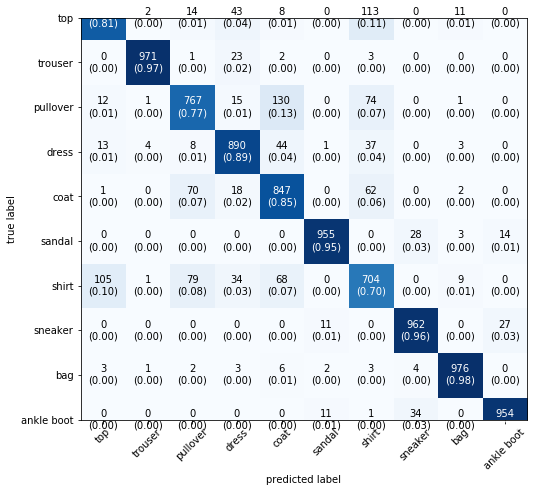

In [85]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)
plt.show()